# ------------------------------Features with different variance--------------------------------

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.linear_model import SGDClassifier

In [3]:
data = pd.read_csv('task_b.csv') #load data into pandas dataframe
print(data)
data=data.iloc[:,1:]

     index           f1            f2        f3    y
0        0  -195.871045 -14843.084171  5.532140  1.0
1        1 -1217.183964  -4068.124621  4.416082  1.0
2        2     9.138451   4413.412028  0.425317  0.0
3        3   363.824242  15474.760647  1.094119  0.0
4        4  -768.812047  -7963.932192  1.870536  0.0
..     ...          ...           ...       ...  ...
195    195   119.423142  -2985.720392  0.929967  0.0
196    196   -37.805502  13061.298176  5.421253  0.0
197    197   181.626647   3179.754101  3.059868  0.0
198    198   443.199825  -1053.252455  5.467800  0.0
199    199   -51.189253   7442.423346  9.528478  1.0

[200 rows x 5 columns]


In [4]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [5]:
data.corr()['y'] #correlation of features with target variable

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [6]:
data.std()      #standard deviations of each features

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [7]:
X=data[['f1','f2','f3']].values      #feature vectors
Y=data['y'].values
print(X.shape)
print(Y.shape)


(200, 3)
(200,)


## LR without standardization

In [20]:
lr=SGDClassifier(loss="log_loss")          #training logistic regression with non standardized data
lr.fit(X,Y)                                



SGDClassifier(loss='log_loss')

In [21]:
importance = lr.coef_[0]            #getting weight vector


Feature: 0, Score(weight): 8209.07514
Feature: 1, Score(weight): -14916.21020
Feature: 2, Score(weight): 10287.78040


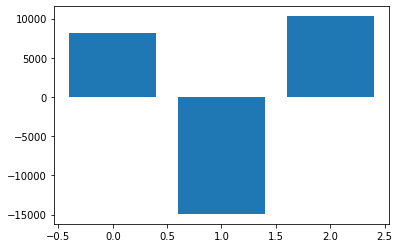

In [22]:
# summarize feature importance       #reference taken from: https://machinelearningmastery.com/calculate-feature-importance-with-python/
for i,v in enumerate(importance):
    print('Feature: %0d, Score(weight): %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## SVM without standardization

In [29]:
svm=SGDClassifier(loss="hinge")              #training SVM with non standardized data
svm.fit(X,Y)



SGDClassifier()

In [30]:
importance = svm.coef_[0]                   #getting weight vector


Feature: 0, Score(weight): 6192.68951
Feature: 1, Score(weight): 15840.99046
Feature: 2, Score(weight): 10835.00169


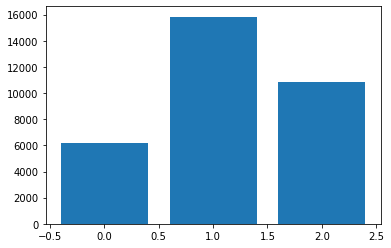

In [31]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score(weight): %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

- feature 2 which had highest variance got the highest feature importance score

## LR with standardization

In [33]:
# define standard scaler
scaler = StandardScaler()                              
# standardising data
scaled = scaler.fit_transform(X)
#print(scaled)

In [34]:
df1 = pd.DataFrame(scaled, columns = ['f1','f2','f3'])

In [36]:
df1.std()           

f1    1.002509
f2    1.002509
f3    1.002509
dtype: float64

In [37]:
df2 = pd.DataFrame(Y, columns=["y"])
df=pd.concat([df1, df2], axis=1)

In [38]:
df.corr()['y']           #variance of the data is changed but the correlation remains same

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [39]:
lr=SGDClassifier(loss="log_loss")            #training logistic regression with standardized data
lr.fit(scaled,Y)



SGDClassifier(loss='log_loss')

In [40]:
importance = lr.coef_[0]          #getting weight vector


Feature: 0, Score: 0.53957
Feature: 1, Score: -2.35989
Feature: 2, Score: 13.16421


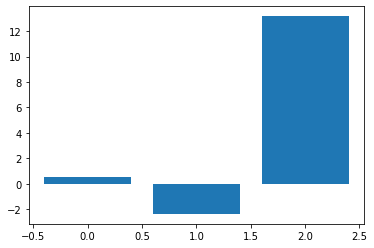

In [41]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## SVM with standardization

In [42]:
svm=SGDClassifier(loss="hinge")#training SVM with  standardized data
svm.fit(scaled,Y)



SGDClassifier()

In [43]:
importance = svm.coef_[0]        #getting weight vector


Feature: 0, Score: -1.19281
Feature: 1, Score: -5.71115
Feature: 2, Score: 28.46407


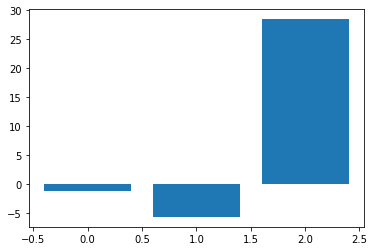

In [44]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Observation
- Before standardisation we can see that the feature 2 which had a **least correlation(=-0.017944)** with prediction has got **highest importance score(weight)**.


- But once the data is **column standardised**, feature which had the **highest correlation** (feature 3) got the **highest importance score(weight)**


- so standardisation of numerical value is very important to avoid the scenario where high variance feature tend to influence models performance irrespective of whether they are highly correlated or not.